In [1]:
%matplotlib inline
import gym
import pandas as pd
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
from FCQ import FCQAgent

env = gym.make('CartPole-v1')
state_size = env.observation_space.shape[0]
action_size = env.action_space.n
agent = FCQAgent(state_size, action_size)
scores=[]
EPISODES = 20000

for e in range(EPISODES+1):
    EPS = max(1-e/EPISODES, 0.05)  # Exploratory Rate Decay for E-Greedy Policy
    state = env.reset()
    done=False
    score=0
    while not(done):
        action = agent.act(state, EPS)
        next_state, reward, done, _ = env.step(action)
        score += reward
        agent.step(state, action, score, next_state, done)
        state = next_state
    agent.learn()  # Learn after collecting experiences by End of Episode
    scores.append(score)
    if e % 1000 == 0 and e>1:
        print("Episode: {}/{}, Score: Rolling Mean: {} - Mean: {} - Median: {} / EPS: {:.2f} ".format(e, EPISODES, int(np.mean(scores[-100:])), int(np.mean(scores)), int(np.median(scores)), EPS))   
    if int(np.mean(scores[-100:])) > 195:
        print("Environment CartPole-v1 is solved since average reward is greater than or equal to 195 over 100 consecutive trials")        
        break

Episode: 1000/20000, Score: Rolling Mean: 19 - Mean: 21 - Median: 18 / EPS: 0.95 
Episode: 2000/20000, Score: Rolling Mean: 26 - Mean: 22 - Median: 19 / EPS: 0.90 
Episode: 3000/20000, Score: Rolling Mean: 29 - Mean: 24 - Median: 20 / EPS: 0.85 
Episode: 4000/20000, Score: Rolling Mean: 31 - Mean: 25 - Median: 21 / EPS: 0.80 
Episode: 5000/20000, Score: Rolling Mean: 39 - Mean: 27 - Median: 22 / EPS: 0.75 
Episode: 6000/20000, Score: Rolling Mean: 51 - Mean: 30 - Median: 24 / EPS: 0.70 
Episode: 7000/20000, Score: Rolling Mean: 58 - Mean: 33 - Median: 26 / EPS: 0.65 
Episode: 8000/20000, Score: Rolling Mean: 78 - Mean: 38 - Median: 28 / EPS: 0.60 
Episode: 9000/20000, Score: Rolling Mean: 110 - Mean: 44 - Median: 30 / EPS: 0.55 
Episode: 10000/20000, Score: Rolling Mean: 166 - Mean: 53 - Median: 33 / EPS: 0.50 
Environment CartPole-v1 is solved since average reward is greater than or equal to 195 over 100 consecutive trials


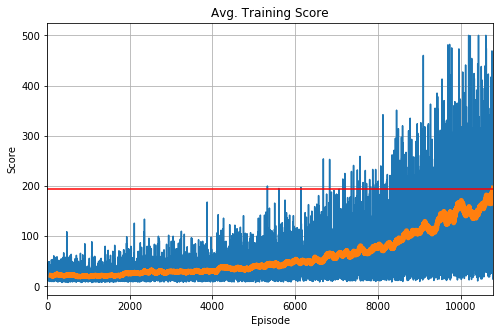

In [8]:
pd.Series(scores).plot()
pd.Series(scores).rolling(100).mean().plot(linewidth=5.0, figsize=(8, 5))
plt.axhline(y=195, color='r', linestyle='-')
plt.xlabel("Episode")
plt.ylabel("Score")
plt.title("Avg. Training Score")
plt.grid()